# Problemas de distribución de probabilidad

In [28]:
from scipy.stats import binom , norm , uniform
import numpy as np
import matplotlib.pyplot as plt

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [29]:


# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def pmf_binomial(x, size, prob=0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k=x, n=size, p=prob, loc=0)

    return result


def cdf_binomial(q, size, prob=0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k=q, n=size, p=prob, loc=0)

    return result


def ppf_binomial(p, size, prob=0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf( q=p, n=size, p=prob, loc=0)

    return result


def rvs_binomial(n, size, prob=0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n=size, p=prob, size=n)

    return result

In [30]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo


np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {pmf_binomial(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {cdf_binomial(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {ppf_binomial(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rvs_binomial(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


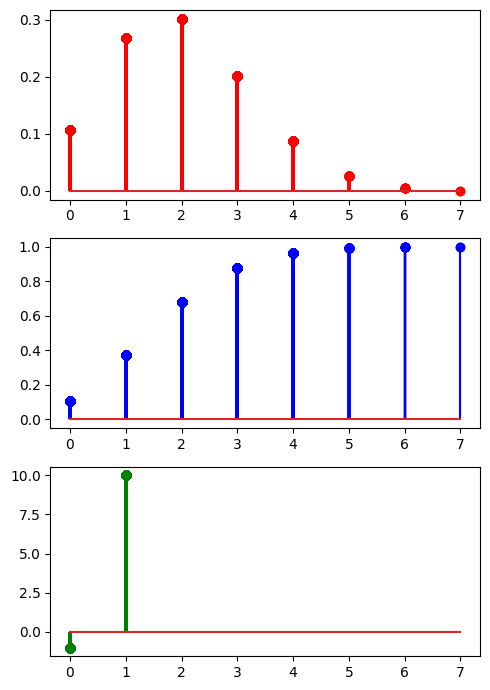

In [31]:

np.random.seed(42)

size = 10
prob = 0.2
data = rvs_binomial(2000, size = 10, prob = 0.2)

pmf = pmf_binomial(data, size = size, prob = prob)
cdf = cdf_binomial(data, size = size, prob = prob)
ppf = ppf_binomial(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

In [32]:
def pdf_normal(n, mean, dev_std):
    """
    Calcula la función de densidad de la distribución normal.
    """
    result = norm.pdf(x=n, loc=mean, scale=dev_std)
    
    return result


def cdf_normal(n, mean, dev_std):
    """
    Calcula el acumulado de la distribución normal.
    """
    result = norm.cdf(x=n, loc=mean, scale=dev_std)
    
    return result


def ppf_normal(p, mean, dev_std):
    """
    Calcula la función cuantil a partir de la distribución normal.
    """
    result = norm.ppf(q=p, loc=mean, scale=dev_std)
    
    return result


def rvs_normal(mean, dev_std, n, rs):
    """
    Genera variables aleatorias a partir de la distribución normal.
    Size: tamaño de la muestra.
    Random State: valor de la semilla
    """
    result = norm.rvs(loc=mean, scale=dev_std, size=n, random_state=rs)
    
    return result











In [33]:
x = np.random.normal(1,0,None)
print(f"Función de densidad de una distribución normal con media 2 y desviación estándar 0.5: {pdf_normal(x,2,0.5)}")
print(f"Acumulado de una distribución normal con media 2 y desviación estándar 0.5: {cdf_normal(x,2,0.5)}")
print(f"Función cuantil de una distribución normal con media 2 y desviación estándar 0.5: {ppf_normal(0.6,2,0.5)}")
print(f"Generamos 10 numeros aleatorios de una distribución normal con media 2 y desviación estándar 0.5: {rvs_normal(2,0.5,10,5)}")

Función de densidad de una distribución normal con media 2 y desviación estándar 0.5: 0.10798193302637613
Acumulado de una distribución normal con media 2 y desviación estándar 0.5: 0.022750131948179195
Función cuantil de una distribución normal con media 2 y desviación estándar 0.5: 2.1266735515679
Generamos 10 numeros aleatorios de una distribución normal con media 2 y desviación estándar 0.5: [2.22061374 1.83456492 3.21538559 1.87395394 2.05480492 2.79124056
 1.5453838  1.70418167 2.09380161 1.83506502]


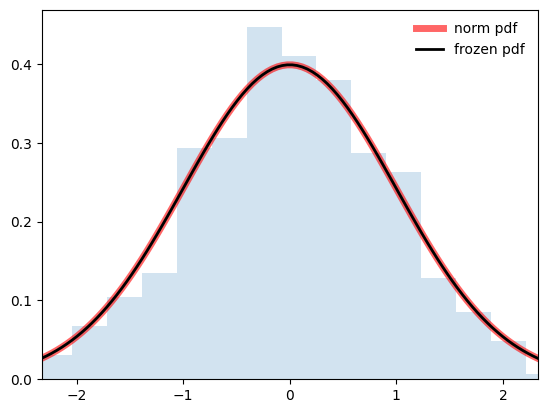

In [34]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, norm.pdf(x), 'k-', lw=2, label='frozen pdf')
r = norm.rvs(size=500)
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()








### Distribucion uniforme

In [35]:

def pdf_uniform(x, a, b):
    """
    Calcula la función de densidad (PDF) de la distribución uniforme.
    a: límite inferior
    b: límite superior
    """
    result = uniform.pdf(x, loc=a, scale=b - a)
    
    return result


def cdf_uniform(x, a, b):
    """
    Calcula el acumulado (CDF) de la distribución uniforme.
    """
    result = uniform.cdf(x, loc=a, scale=b - a)
    
    return result


def ppf_uniform(p, a, b):
    """
    Calcula la función cuantil (PPF) de la distribución uniforme.
    """
    result = uniform.ppf(p, loc=a, scale=b - a)

    return result


def rvs_uniform(a, b, size, rs=None):
    """
    Genera variables aleatorias desde una distribución uniforme.
    size: tamaño de la muestra
    rs: semilla (random_state)
    """
    result = uniform.rvs(loc=a, scale=b - a, size=size, random_state=rs)
    
    return result


In [36]:
x = np.random.uniform(1, 3)  # valor aleatorio en [1, 3)

print(f"PDF (función de densidad) en x = {x}: {pdf_uniform(x, 1, 3)}")
print(f"CDF (acumulado) en x = {x}: {cdf_uniform(x, 1, 3)}")
print(f"PPF (cuantil) en p = 0.6: {ppf_uniform(0.6, 1, 3)}")
print(f"10 valores aleatorios de U(1,3): {rvs_uniform(1, 3, 10, rs=5)}")


PDF (función de densidad) en x = 1.7204678376008558: 0.5
CDF (acumulado) en x = 1.7204678376008558: 0.3602339188004279
PPF (cuantil) en p = 0.6: 2.2
10 valores aleatorios de U(1,3): [1.44398634 2.74146461 1.41343831 2.83722182 1.97682238 2.22348773
 2.53181571 2.03683598 1.593601   1.37544246]


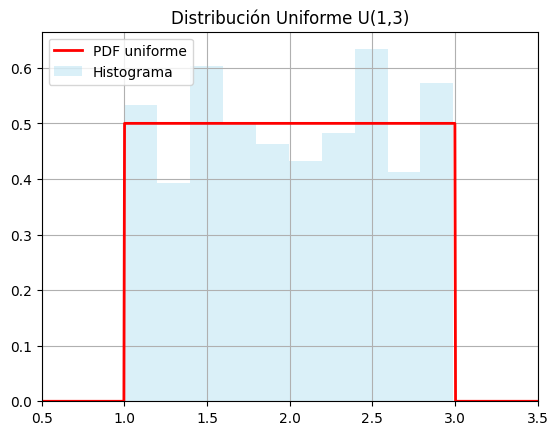

In [37]:

a, b = 1, 3
x = np.linspace(a - 1, b + 1, 1000)
pdf_vals = pdf_uniform(x, a, b)

fig, ax = plt.subplots()
ax.plot(x, pdf_vals, 'r-', lw=2, label='PDF uniforme')
r = rvs_uniform(a, b, size=500)
ax.hist(r, bins='auto', density=True, alpha=0.3, color='skyblue', label='Histograma')
ax.set_xlim([a - 0.5, b + 0.5])
ax.legend()
ax.set_title("Distribución Uniforme U(1,3)")
plt.grid(True)
plt.show()
